In [1]:
import warnings
warnings.filterwarnings("default", category=DeprecationWarning)
import numpy as np
import matplotlib.pylab as plt
import tensorflow as tf
from keras.models import Model, Sequential
from keras.layers import Input, Activation, Dense
from keras.optimizers import SGD

/usr/local/anaconda3/envs/dl_101/lib/python3.7/site-packages/tensorflow/python/util/nest.py:1286: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  _pywrap_tensorflow.RegisterType("Mapping", _collections.Mapping)
/usr/local/anaconda3/envs/dl_101/lib/python3.7/site-packages/tensorflow/python/util/nest.py:1287: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  _pywrap_tensorflow.RegisterType("Sequence", _collections.Sequence)
/usr/local/anaconda3/envs/dl_101/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/anaconda3/envs/

In [2]:
import keras
import pydot as pyd
keras.utils.vis_utils.pydot = pyd
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
from keras.utils import plot_model

In [3]:
# Generate data from -20, -19.75, -19.5, .... , 20
train_x = np.arange(-20, 20, 0.25)

# Calculate Target : sqrt(2x^2 + 1)
train_y = np.sqrt((2*train_x**2)+1)

In [4]:
# Create Network
inputs = Input(shape=(1,))
h_layer = Dense(8, activation='relu')(inputs) # 1*8 + 8 = 16
h_layer = Dense(4, activation='relu')(h_layer) # 8*4 + 4 = 36
outputs = Dense(1, activation='linear')(h_layer) # 4*1 + 1 = 5
model = Model(inputs=inputs, outputs=outputs)

In [5]:
(150*150*50)

1125000

In [6]:
# Optimizer / Update Rule
sgd = SGD(lr=0.001)
# Compile the model with Mean Squared Error Loss
model.compile(optimizer=sgd, loss='mse')
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 1)                 0         
_________________________________________________________________
dense_1 (Dense)              (None, 8)                 16        
_________________________________________________________________
dense_2 (Dense)              (None, 4)                 36        
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 5         
Total params: 57
Trainable params: 57
Non-trainable params: 0
_________________________________________________________________


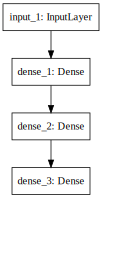

In [7]:
def visualize_model(model):
    return SVG(model_to_dot(model).create(prog='dot', format='svg'))

visualize_model(model)

In [8]:
# Train the network and save the weights after training
# model.fit(train_x, train_y, batch_size=20, epochs=10000, verbose=1)
# model.save_weights('weights_regression.h5')
model.load_weights('weights_regression.h5')

In [9]:
# Predict training data
predict = model.predict(np.array([26]))
print('f(26) = ', predict)


f(26) =  [[27.873224]]


In [10]:
predict_y = model.predict(train_x)

In [11]:
predict_y.shape

(160, 1)

In [12]:
train_x.shape

(160,)

In [13]:
train_y.shape

(160,)

In [ ]:
# # Draw target vs prediction
plt.plot(train_x, train_y, 'r')
plt.plot(train_x, predict_y, 'b')
plt.show()

In [ ]:
# # Data for plotting
# t = train_x
# s = train_y

# fig, ax = plt.subplots()
# ax.plot(t, s)

# ax.set(xlabel='train', ylabel='fx',
#        title='non linear')
# ax.grid()

# # fig.savefig("test.png")
# plt.show()